Final Física Teórica 1 \
Daiana Dominikow - 2022 \
Fuerzas centrales, método de Euler

In [105]:
import math
import scipy.constants
import numpy as np
import matplotlib.pyplot as plt

In [106]:
m1 = 3e30 #masa de la primer estrella
m2 = 2e30 #masa de la segunda estrella
M = m1+m2 
mu = m1*m2/M #masa reducida

d = 2e10 #distancia entre las estrellas

#posición centros de masa
x1 = -(m2/M)*d
x2 = (m1/M)*d

#posicion estrella 1
star1_inicial = np.array([x1,0,0])
star2_inicial = np.array([x2,0,0])

#radio
r1 = 2.2e9
r2 = 8e8

#centro de masa
cm = (star1_inicial*m1 + star2_inicial*m2)/M
#si imprimo el centro de masa, me tiene que devolver el origen 
r_inicial = star2_inicial - star1_inicial

#ahora, les tengo que dar un momento inicial a ambas estrellas
#solo necesito la velocidad  de una de ellas
v_r1 = math.sqrt(scipy.constants.G * m2 * np.linalg.norm(star1_inicial)/np.linalg.norm(r)**2)
#para una orbita circular
star1v_inicial = np.array([0,v_r1,0])
#para una orbita eliptica
#star1v = np.array([0,0.2*v_r1,0])

#por conservacion del momento
star1p_inicial = m1*star1v_inicial
star2p_inicial = -star1p_inicial

l = np.linalg.norm(np.cross(star1_inicial,star1p_inicial)+np.cross(star2_inicial,star2p_inicial))

#tiempo
tf = 1e6  
dt = 1e4
t = np.arange(0 , tf + dt ,dt)
t_len = len(t) - 1


In [107]:
def energia_potencial(m1_pos,m2_pos,m1_p,m2_p):
    i=0
    Ug = []
    Uc = []
    Uef = []
    star1=m1_pos
    star2=m2_pos
    r = m2_pos - m1_pos
    r_norm = []
    star1p = m1_p
    star2p = m2_p

    while i<t_len:
        r = star2 - star1
        r_norm.append(np.linalg.norm(r))
        F2 = - scipy.constants.G*m1*m2/r_norm[i]**2
        star1p = star1p - F2*dt
        star2p = star2p + F2*dt
        star1 = star1 + (star1p*dt)/m1
        star2 = star2 + (star2p*dt)/m2

        Ug.append(- scipy.constants.G*m1*m2/r_norm[i])
        Uc.append(l**2/(2*mu*r_norm[i]**2))
        Uef.append(Uc[i]+ Ug[i])
        
        i=i+1


    plt.figure(1)    
    plt.plot(r_norm,Ug,'green')
    plt.plot(r_norm,Uc,'blue')
    plt.plot(r_norm,Uef,'red')
    plt.show()


In [108]:
def posicion_r(m1_pos,m2_pos,m1_p,m2_p):
    i = 0
    r_norm = []
    r = star2_inicial - star1_inicial
    r_norm = []
    r_norm.append(np.linalg.norm(r))
    star1p = m1_p 
    star2p = m2_p
    star1 = m1_pos
    star2= m2_pos

    while i<t_len:
        r_uni = r / r_norm[i]
        F2 = - scipy.constants.G*m1*m2*r_uni/r_norm[i]**2
        star1p = star1p - F2*dt
        star2p = star2p + F2*dt
        star1 = star1 + (star1p*dt)/m1
        star2 = star2 + (star2p*dt)/m2
        r = star2 - star1
        r_norm.append(np.linalg.norm(r))

        plt.figure(1)
        plt.plot(i,r_norm[i],'.')

        plt.figure(2)
        plt.plot(i,np.linalg.norm(star2p/m2),'.r')
        plt.plot(i,np.linalg.norm(star1p/m1),'.b')

        i=i+1


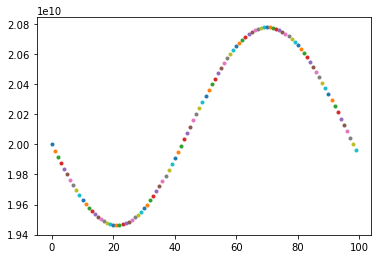

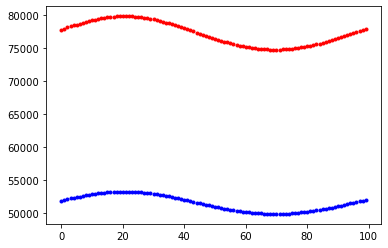

In [109]:
posicion_r(star1_inicial,star2_inicial,star1p_inicial,star2p_inicial)

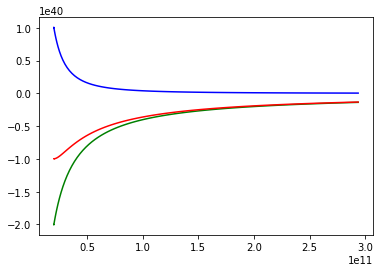

In [110]:
energia_potencial(star1_inicial,star2_inicial,star1p_inicial,star2p_inicial)
